# Question 1 : Delivery time

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.metrics import r2_score

In [2]:
delivery = pd.read_csv('./Downloads/delivery_time.csv')
delivery

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [3]:
delivery.shape

(21, 2)

Text(0, 0.5, 'Delivery Time')

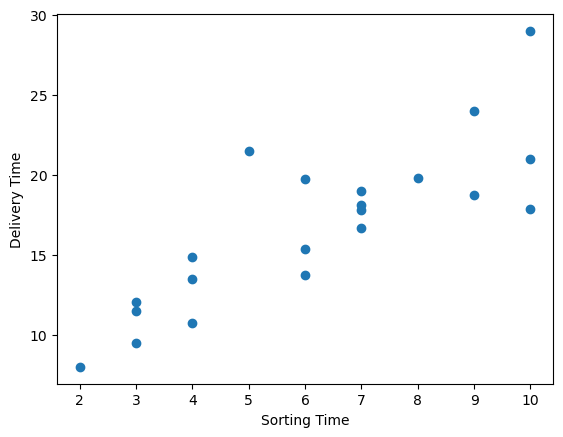

In [4]:
plt.scatter(delivery['Sorting Time'], delivery['Delivery Time'])
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')

<AxesSubplot:>

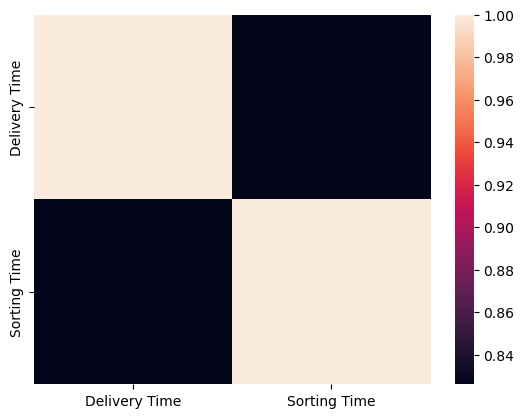

In [5]:
sns.heatmap(delivery.corr())

In [31]:
# Linear Regression
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
x = delivery['Sorting Time'].values.reshape(-1,1)
y = delivery['Delivery Time'].values.reshape(-1,1)
lm.fit(x,y)

LinearRegression()

In [32]:
lm.predict(x)

array([[23.07293294],
       [13.17881356],
       [16.47685335],
       [21.42391304],
       [23.07293294],
       [16.47685335],
       [18.12587325],
       [11.52979366],
       [23.07293294],
       [21.42391304],
       [19.77489315],
       [13.17881356],
       [18.12587325],
       [11.52979366],
       [11.52979366],
       [13.17881356],
       [16.47685335],
       [18.12587325],
       [ 9.88077377],
       [18.12587325],
       [14.82783346]])

[[1.6490199]] [6.58273397]
Predicted delivery time for this sorting time is [[26.37097273]]


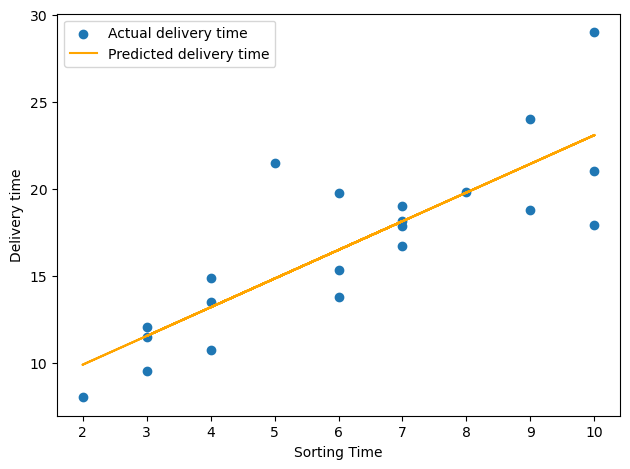

In [30]:
# Modeling
model = LinearRegression()
model.fit(x,y)
pred = model.predict(x)

#print(pred.round(2))

print(model.coef_, model.intercept_)

# Model predictions of delivery time say for sorting time 12

def delivery_pred(sorting_time):
    pred_delivery = (model.coef_)*sorting_time +  model.intercept_
    return pred_delivery

print('Predicted delivery time for this sorting time is',delivery_pred(12))


# Plot beyween actual and predicted
fig, ax = plt.subplots()

plt.scatter(delivery['Sorting Time'], delivery['Delivery Time'])
plt.plot(delivery['Sorting Time'], pred, color = 'orange')
plt.xlabel('Sorting Time')
plt.ylabel('Delivery time')

plt.tight_layout()
plt.legend(labels = ['Actual delivery time','Predicted delivery time'])

In [ ]:
# Delivery_Time_pred = m*Sorting_Time + c          =====> 0.67
# Delivery_Time_pred = m*log(Sorting_Time) + b     =====> 0.675
# log(Delivery_Time_pred) = m*exp(Sorting_Time) + b     =====> 0.7
# log(Delivery_Time_pred) = m1*(Sorting_Time) + m2*(Sorting_Time)^2 + b    =====> 0.78
# y = 2x + 4x^2 + 10

In [9]:
data = delivery.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis = 1)
data

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


# Model1

In [70]:
#Model1
import statsmodels.formula.api as smf
model1 = smf.ols('delivery_time~sorting_time', data = data).fit()
pred1 = model1.predict(pd.DataFrame(data['sorting_time']))
r2_score(data['delivery_time'], pred1)

0.6822714748417231

In [ ]:
model1.params

In [ ]:
model1.resid     # resid = actual-predicted

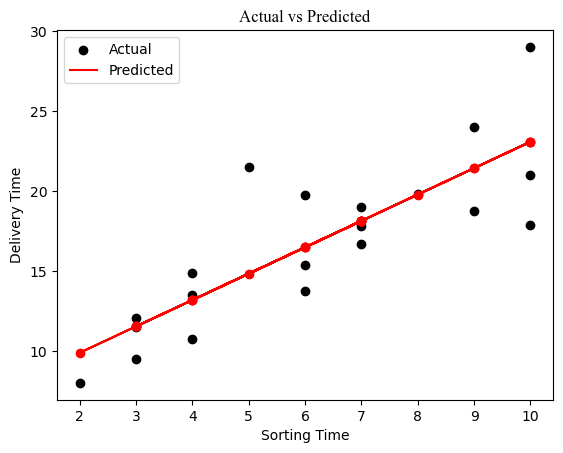

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Tue, 11 Apr 2023   Prob (F-statistic):           3.98e-06
Time:                        21:29:22   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [74]:
plt.scatter(data.sorting_time, data.delivery_time, label = 'Actual', color = 'black')
plt.plot(data.sorting_time, pred1, label='Predicted', color = 'red')
plt.scatter(data.sorting_time, pred1, color = 'red')
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')
plt.title('Actual vs Predicted', fontname = 'Times New Roman')
plt.legend(loc = 'best')
plt.show()
model1.summary()

# Model2

In [13]:
model2 = smf.ols('delivery_time~np.log(sorting_time)', data = data).fit()
pred2 = model2.predict(pd.DataFrame(data['sorting_time']))
r2_score(data['delivery_time'], pred2)

0.6954434611324223

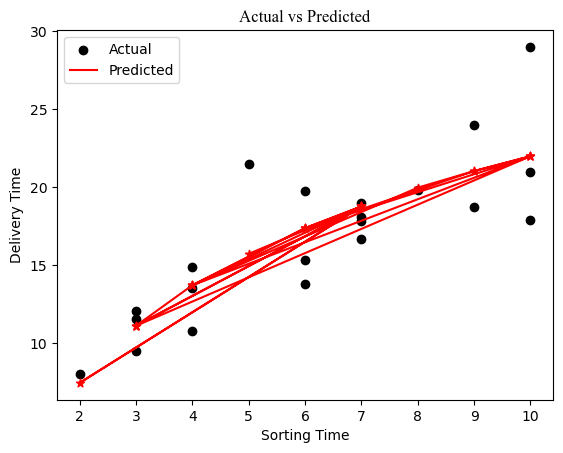

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Tue, 11 Apr 2023   Prob (F-statistic):           2.64e-06
Time:                        21:29:14   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(sorting_time)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [73]:
plt.scatter(data.sorting_time, data.delivery_time, label = 'Actual', color = 'black')
plt.plot(data.sorting_time, pred2,label='Predicted', color = 'red')
plt.scatter(data.sorting_time, pred2, marker = '*', color = 'red')
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')
plt.title('Actual vs Predicted', fontname = 'Times New Roman')
plt.legend(loc = 'best')
plt.show()
model2.summary()

# Model3

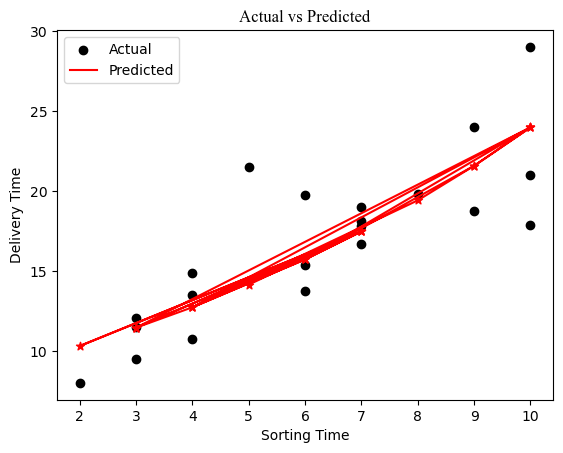

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(delivery_time)   R-squared:                       0.711
Model:                               OLS   Adj. R-squared:                  0.696
Method:                    Least Squares   F-statistic:                     46.73
Date:                   Tue, 11 Apr 2023   Prob (F-statistic):           1.59e-06
Time:                           21:29:00   Log-Likelihood:                 7.7920
No. Observations:                     21   AIC:                            -11.58
Df Residuals:                         19   BIC:                            -9.495
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.1214      0.103     20.601      0.000       1.906       2.337
sorting_time     0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [72]:
model3 = smf.ols('np.log(delivery_time)~sorting_time', data=data).fit()
model3.summary()
pred3 = model3.predict(pd.DataFrame(data['sorting_time']))
predlog = np.exp(pred3)
plt.scatter(data['sorting_time'],data['delivery_time'],label = 'Actual',color = 'black')
plt.plot(data.sorting_time, predlog, label = 'Predicted',color = 'red')
plt.scatter(data.sorting_time, predlog, marker = '*', color = 'red')
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')
plt.title('Actual vs Predicted', fontname = 'Times New Roman')
plt.legend(loc = 'best')
plt.show()

model3.summary()

# Model4

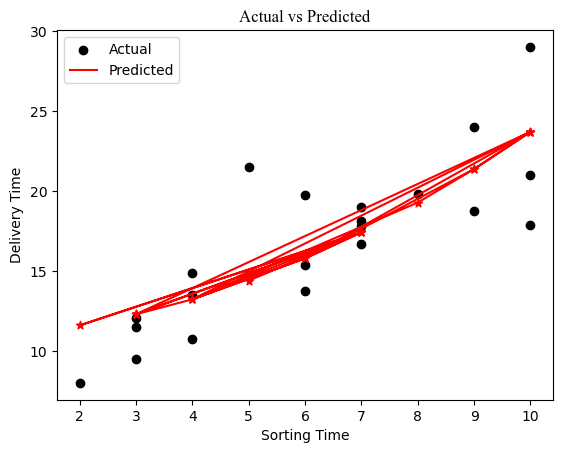

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.635
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     33.11
Date:                Tue, 11 Apr 2023   Prob (F-statistic):           1.52e-05
Time:                        19:19:10   Log-Likelihood:                -52.802
No. Observations:                  21   AIC:                             109.6
Df Residuals:                      19   BIC:                             111.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.8961      1.233      8.837      0.000       8.316      13.477
st             0.1163      0.020      5.754      0.000       0.074       0.159
==============================================================================
Omnibus:                        1.668   Durbin-Watson:                   1.243
Prob(Omnibus):                  0.434   Jarque-Bera (JB):                0.842
Skew:                           0.489   Prob(JB):                        0.657
Kurtosis:                       3.080   Cond. No.                         110.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
data['sorting_time_sq'] = data.sorting_time**2 + data.sorting_time
st = data['sorting_time_sq']
model4 = smf.ols('delivery_time~st', data = data).fit()
# model4.summary()

pred4 = model4.predict(pd.DataFrame(data['sorting_time']))


plt.scatter(data['sorting_time'],data['delivery_time'],label = 'Actual',color = 'black')
plt.plot(data.sorting_time, pred4, label = 'Predicted',color = 'red')
plt.scatter(data.sorting_time, pred4, marker = '*', color = 'red')
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')
plt.title('Actual vs Predicted', fontname = 'Times New Roman')
plt.legend(loc = 'best')
plt.show()

model4.summary()

## Model 3 is giving better R2_score compared to other models.


# 

# 

# Question 2 : Salary hike

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [52]:
salary = pd.read_csv('./Downloads/Salary_Data.csv')
salary

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


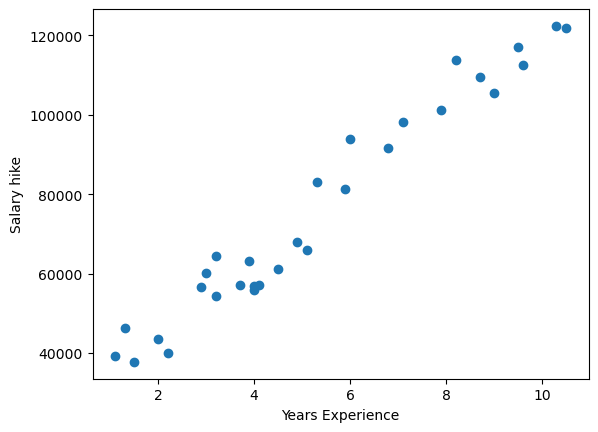

In [35]:
plt.scatter(salary['YearsExperience'],salary['Salary'])
plt.xlabel('Years Experience');
plt.ylabel('Salary hike');

<AxesSubplot:>

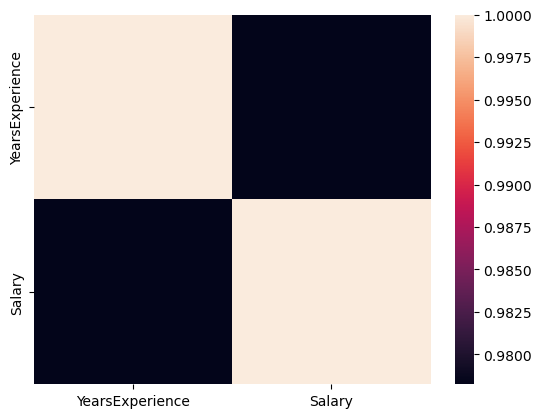

In [36]:
sns.heatmap(salary.corr())

In [37]:
x1 = salary['YearsExperience'].values.reshape(-1,1)
y1 = salary['Salary'].values

In [ ]:
mean_x1 = np.mean(x1)
mean_y1 = np.mean(y1)

n = len(x1)

numer = 0
denom = 0

for i in range(n):
    numer += (x1[i] - mean_x1)*(y1[i] - mean_y1)
    denom += (x1[i] - mean_x1)**2
    
m = numer / denom
c = mean_y1 - (m * mean_x1)

print(m,c)

0      36187.16
1      38077.15
2      39967.14
3      44692.12
4      46582.12
5      53197.09
6      54142.09
7      56032.08
8      56032.08
9      60757.06
10     62647.05
11     63592.05
12     63592.05
13     64537.05
14     68317.03
15     72097.02
16     73987.01
17     75877.00
18     81546.98
19     82491.97
20     90051.94
21     92886.93
22    100446.90
23    103281.89
24    108006.87
25    110841.86
26    115566.84
27    116511.84
28    123126.81
29    125016.80
Name: pred1, dtype: float64
[9449.96232146] 25792.20019866871
The predicted salary for given years experience is [167541.63502049]


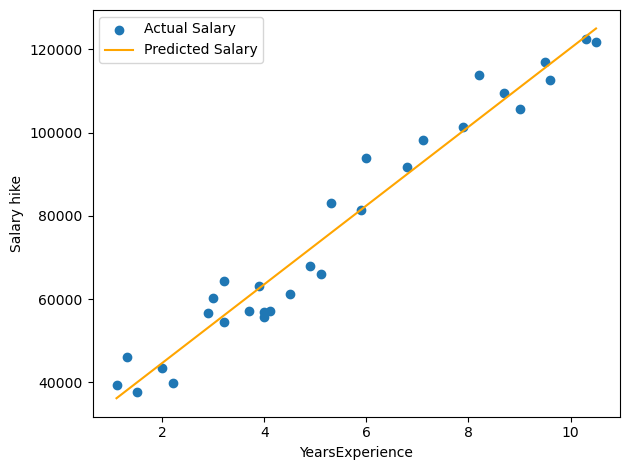

In [40]:
# modeling

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x1,y1)
pred1 = lr.predict(x1)
salary['pred1'] = pred1

print(salary['pred1'].round(2))

print(lr.coef_,lr.intercept_)

# Model predictions of salary hike say for year_experience 15

def salary_pred(year):
    pred_hike = (lr.coef_)*year +  lr.intercept_
    return pred_hike

print('The predicted salary for given years experience is',salary_pred(15))


# Plot between actual and predicted
fig, ax = plt.subplots()
# salary.set_index('Salary')['pred'].plot(style = '--', color = 'red')

plt.scatter(salary['YearsExperience'],salary['Salary'])
plt.plot(salary['YearsExperience'], pred1, color = 'orange')
plt.xlabel('YearsExperience')
plt.ylabel('Salary hike')

plt.tight_layout()
plt.legend(labels = ['Actual Salary','Predicted Salary'])

# Model1

In [43]:
import statsmodels.formula.api as smf
model11 = smf.ols('Salary~YearsExperience', data = salary).fit()
pred11 = model11.predict(salary['YearsExperience'])
r2_score(salary['Salary'], pred11)

0.9569566641435086

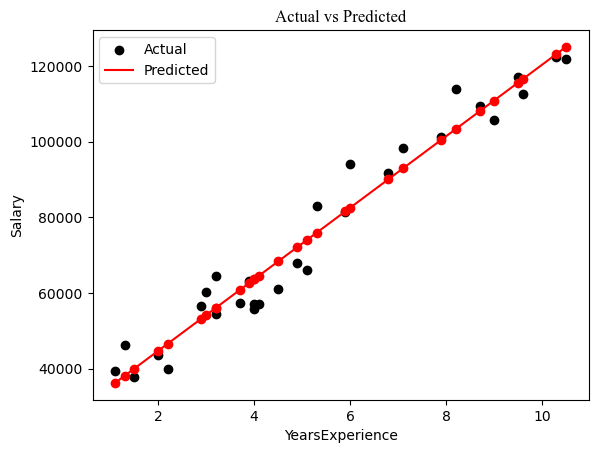

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Tue, 11 Apr 2023   Prob (F-statistic):           1.14e-20
Time:                        21:29:51   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [75]:
plt.scatter(salary.YearsExperience,salary.Salary, label = 'Actual', color = 'black')
plt.plot(salary.YearsExperience, pred11, label='Predicted', color = 'red')
plt.scatter(salary.YearsExperience, pred11, color = 'red')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.title('Actual vs Predicted', fontname = 'Times New Roman')
plt.legend(loc = 'best')
plt.show()
model11.summary()

# Model2

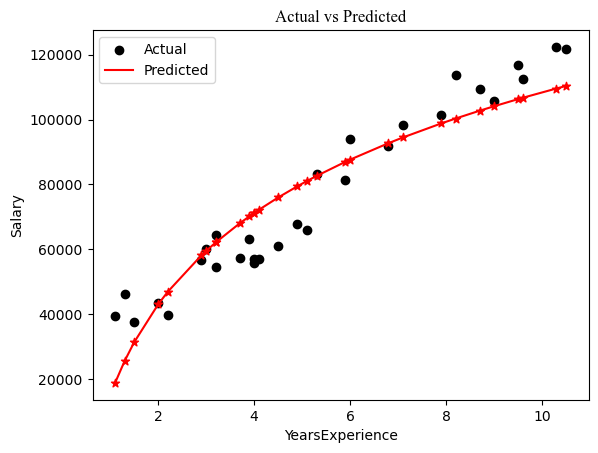

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Tue, 11 Apr 2023   Prob (F-statistic):           3.25e-13
Time:                        21:16:55   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
np.log(YearsExperience)  4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
model22 = smf.ols('Salary~np.log(YearsExperience)', data=salary).fit()
model22.summary()
pred22 = model22.predict(pd.DataFrame(salary['YearsExperience']))
# predlog2 = np.exp(pred22)
plt.scatter(salary['YearsExperience'],salary['Salary'],label = 'Actual',color = 'black')
plt.plot(salary.YearsExperience, pred22, label = 'Predicted',color = 'red')
plt.scatter(salary.YearsExperience, pred22, marker = '*', color = 'red')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.title('Actual vs Predicted', fontname = 'Times New Roman')
plt.legend(loc = 'best')
plt.show()

model22.summary()

# Model3

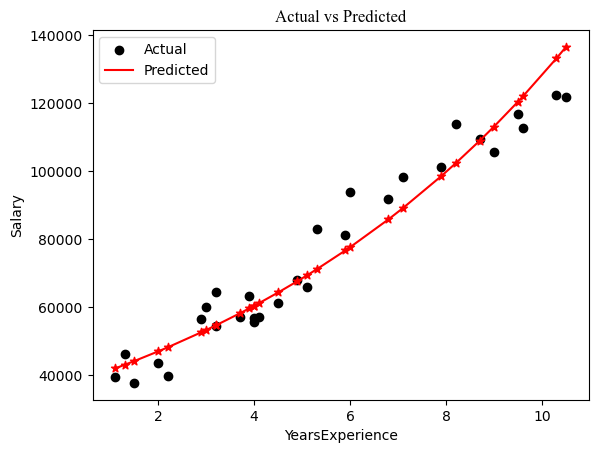

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     383.6
Date:                Tue, 11 Apr 2023   Prob (F-statistic):           7.03e-18
Time:                        21:17:22   Log-Likelihood:                 28.183
No. Observations:                  30   AIC:                            -52.37
Df Residuals:                      28   BIC:                            -49.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          10.5074      0.038    273.327      0.000      10.429      10.586
YearsExperience     0.1255      0.006     19.585      0.000       0.112       0.139
==============================================================================
Omnibus:                        0.826   Durbin-Watson:                   1.438
Prob(Omnibus):                  0.661   Jarque-Bera (JB):                0.812
Skew:                           0.187   Prob(JB):                        0.666
Kurtosis:                       2.286   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
model33 = smf.ols('np.log(Salary)~YearsExperience', data=salary).fit()
model33.summary()
pred33 = model33.predict(pd.DataFrame(salary['YearsExperience']))
predlog3 = np.exp(pred33)
plt.scatter(salary['YearsExperience'],salary['Salary'],label = 'Actual',color = 'black')
plt.plot(salary.YearsExperience, predlog3, label = 'Predicted',color = 'red')
plt.scatter(salary.YearsExperience, predlog3, marker = '*', color = 'red')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.title('Actual vs Predicted', fontname = 'Times New Roman')
plt.legend(loc = 'best')
plt.show()

model33.summary()

# Model4

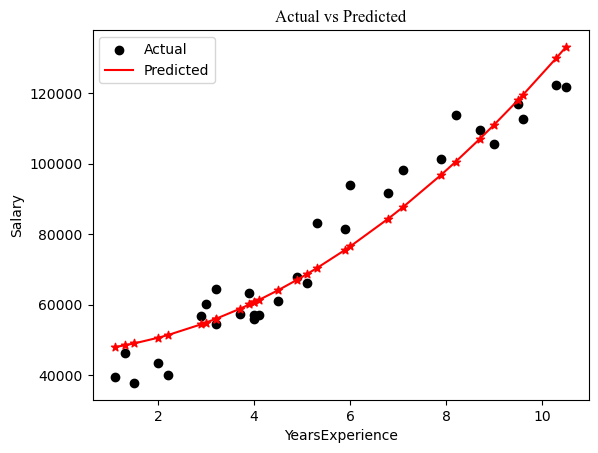

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     328.8
Date:                Tue, 11 Apr 2023   Prob (F-statistic):           5.21e-17
Time:                        21:21:58   Log-Likelihood:                -310.45
No. Observations:                  30   AIC:                             624.9
Df Residuals:                      28   BIC:                             627.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.625e+04   2174.161     21.275      0.000    4.18e+04    5.07e+04
sl           719.7705     39.692     18.134      0.000     638.466     801.075
==============================================================================
Omnibus:                        1.514   Durbin-Watson:                   0.946
Prob(Omnibus):                  0.469   Jarque-Bera (JB):                1.416
Skew:                           0.455   Prob(JB):                        0.493
Kurtosis:                       2.448   Cond. No.                         83.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
salary['years_sq'] = salary.YearsExperience**2 + salary.YearsExperience
sl = salary['years_sq']
model44 = smf.ols('Salary~sl', data = salary).fit()
# model4.summary()

pred44 = model44.predict(pd.DataFrame(salary['YearsExperience']))

plt.scatter(salary['YearsExperience'],salary['Salary'],label = 'Actual',color = 'black')
plt.plot(salary.YearsExperience, pred44, label = 'Predicted',color = 'red')
plt.scatter(salary.YearsExperience, pred44, marker = '*', color = 'red')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.title('Actual vs Predicted', fontname = 'Times New Roman')
plt.legend(loc = 'best')
plt.show()

model44.summary()

## In this, model1 performs better results with r2_score 0.957